In [2]:
import h5py as h5
def ang2eq(theta, phi):
    ra = phi * 180. / np.pi
    dec = 90. - theta * 180. / np.pi
    return ra, dec


def eq2ang(ra, dec):
    phi = ra * np.pi / 180.
    theta = (np.pi / 2.) - dec * (np.pi / 180.)
    return theta, phi

def get_zmean(zcent,delz,nz_bin):
    prob_zcent = nz_bin
    zmean = (np.sum(prob_zcent*zcent*delz))/(np.sum(prob_zcent*delz))
    return zmean

In [10]:
import treecorr
from tqdm import tqdm
ldir = '/global/cfs/cdirs/des/mgatti/maps_shivam/'
nsim =40
minrad = 6.0
maxrad = 250.0
nrad = 15
dfj0 = pk.load(open(ldir + 'maps_NEW_grid_fiducialcosmo_SC_k_Om=0.26_s8=0.84num=' + str(0) + 'A_IA=0.00e_IA=0.00.pkl', 'rb'))[3]['EE']
npix_ymap = len(dfj0)
nside_ymap = hp.npix2nside(npix_ymap)
pix_theta, pix_phi = hp.pix2ang(nside_ymap, np.arange(npix_ymap))
pix_ra, pix_dec = ang2eq(pix_theta, pix_phi)
pix_ra_k, pix_dec_k = pix_ra, pix_dec
xi_kappa_orig = np.zeros((nrad, nsim))
for ji in tqdm(range(nsim)):
    dfji = pk.load(open(ldir + 'maps_NEW_grid_fiducialcosmo_SC_k_Om=0.26_s8=0.84num=' + str(ji) + 'A_IA=0.00e_IA=0.00.pkl', 'rb'))[3]
    kji = dfji['EE']
    kappa_cat = treecorr.Catalog(ra=pix_ra_k, dec=pix_dec_k, k=kji-np.mean(kji),
                                            ra_units='degrees', dec_units='degrees')
                
    # print('doing kw calculation')
    kappaw = treecorr.KKCorrelation(nbins=nrad, min_sep=minrad, max_sep=maxrad, sep_units='arcmin', verbose=0,bin_slop=0.0) 
    kappaw.process(kappa_cat, kappa_cat)
    xi_kappaw = kappaw.xi
    r_kappaw = np.exp(kappaw.meanlogr)
    xi_kappa_orig[:, ji] = xi_kappaw






100%|██████████| 40/40 [05:07<00:00,  7.69s/it]


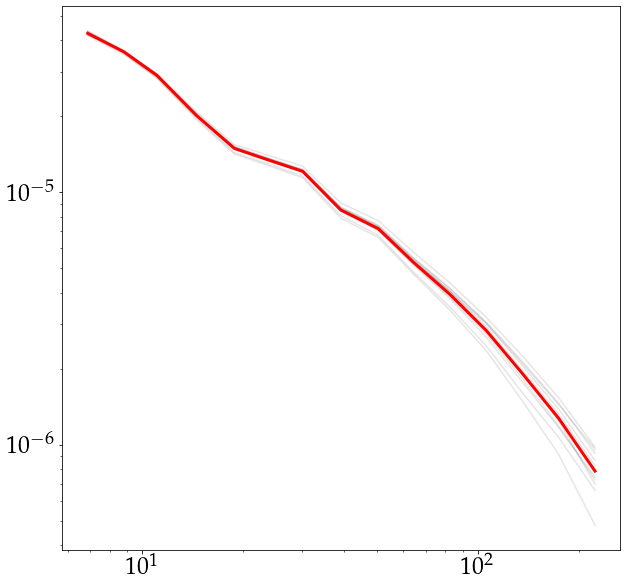

In [9]:
# nside_ymap
pl.figure(figsize=(10, 10))
for ji in range(nsim):
    pl.plot(r_kappaw, xi_kappa_orig[:, ji], color='k', alpha=0.1)
pl.plot(r_kappaw, np.mean(xi_kappa_orig, axis=1), color='r', lw=3)
pl.xscale('log')
pl.yscale('log')
pl.ylabel(r'$\xi_{\kappa \kappa}$')
pl.xlabel(r'$\theta$ [arcmin]')
pl.savefig('xi_kappa_orig.png')


In [11]:
import treecorr
from tqdm import tqdm
ldir = '/global/cfs/cdirs/des/mgatti/maps_shivam/'
# nsim =10
minrad = 6.0
maxrad = 250.0
nrad = 15
fname = '/global/cfs/cdirs/des/cosmogrid/DESY3/fiducial/cosmo_fiducial/perm_0000/projected_probes_maps_nobaryons512.h5' 
df = h5.File(fname, 'r')
dfj0 = df['kg']['desy3metacal3'][:]
# dfj0 = pk.load(open(ldir + 'maps_NEW_grid_fiducialcosmo_SC_k_Om=0.26_s8=0.84num=' + str(0) + 'A_IA=0.00e_IA=0.00.pkl', 'rb'))[3]['EE']
npix_ymap = len(dfj0)
nside_ymap = hp.npix2nside(npix_ymap)
pix_theta, pix_phi = hp.pix2ang(nside_ymap, np.arange(npix_ymap))
pix_ra, pix_dec = ang2eq(pix_theta, pix_phi)
pix_ra_k, pix_dec_k = pix_ra, pix_dec
xi_kappa_new = np.zeros((nrad, nsim))
for jsim in tqdm(range(nsim)):
    if jsim < 10:
        ldir_sims = '/global/cfs/cdirs/des/cosmogrid/DESY3/fiducial/cosmo_fiducial/perm_000' + str(jsim) + '/'
    elif jsim < 100:
        ldir_sims = '/global/cfs/cdirs/des/cosmogrid/DESY3/fiducial/cosmo_fiducial/perm_00' + str(jsim) + '/'
    elif jsim < 1000:
        ldir_sims = '/global/cfs/cdirs/des/cosmogrid/DESY3/fiducial/cosmo_fiducial/perm_0' + str(jsim) + '/'
    else:
        pass
    fname = ldir_sims + 'projected_probes_maps_nobaryons512.h5' 
    df_sim = h5.File(fname, 'r')    

    # dfji = pk.load(open(ldir + 'maps_NEW_grid_fiducialcosmo_SC_k_Om=0.26_s8=0.84num=' + str(ji) + 'A_IA=0.00e_IA=0.00.pkl', 'rb'))[3]
    kji = df_sim['kg']['desy3metacal4'][:]
    kappa_cat = treecorr.Catalog(ra=pix_ra_k, dec=pix_dec_k, k=kji-np.mean(kji),
                                            ra_units='degrees', dec_units='degrees')
                
    # print('doing kw calculation')
    kappaw = treecorr.KKCorrelation(nbins=nrad, min_sep=minrad, max_sep=maxrad, sep_units='arcmin', verbose=0,bin_slop=0.0) 
    kappaw.process(kappa_cat, kappa_cat)
    xi_kappaw = kappaw.xi
    r_kappaw_new = np.exp(kappaw.meanlogr)
    xi_kappa_new[:, jsim] = xi_kappaw






100%|██████████| 40/40 [04:14<00:00,  6.36s/it]


In [12]:
import treecorr
from tqdm import tqdm
ldir = '/global/cfs/cdirs/des/mgatti/maps_shivam/'
# nsim =10
minrad = 6.0
maxrad = 250.0
nrad = 15
fname = '/global/cfs/cdirs/des/cosmogrid/DESY3/fiducial/cosmo_fiducial/perm_0000/projected_probes_maps_nobaryons512.h5' 
df = h5.File(fname, 'r')
dfj0 = df['kg']['desy3metacal3'][:]
# dfj0 = pk.load(open(ldir + 'maps_NEW_grid_fiducialcosmo_SC_k_Om=0.26_s8=0.84num=' + str(0) + 'A_IA=0.00e_IA=0.00.pkl', 'rb'))[3]['EE']
npix_ymap = len(dfj0)
nside_ymap = hp.npix2nside(npix_ymap)
pix_theta, pix_phi = hp.pix2ang(nside_ymap, np.arange(npix_ymap))
pix_ra, pix_dec = ang2eq(pix_theta, pix_phi)
pix_ra_k, pix_dec_k = pix_ra, pix_dec
xi_kappa_here = np.zeros((nrad, nsim))
for jsim in tqdm(range(nsim)):
    ldir_sims = '/global/cfs/cdirs/lsst/www/shivamp/gen_mom/cosmogrid_kappa/fiducial/ns_512/'
    # if jsim < 10:
    #     ldir_sims = '/global/cfs/cdirs/des/cosmogrid/DESY3/fiducial/cosmo_fiducial/perm_000' + str(jsim) + '/'
    # elif jsim < 100:
    #     ldir_sims = '/global/cfs/cdirs/des/cosmogrid/DESY3/fiducial/cosmo_fiducial/perm_00' + str(jsim) + '/'
    # elif jsim < 1000:
    #     ldir_sims = '/global/cfs/cdirs/des/cosmogrid/DESY3/fiducial/cosmo_fiducial/perm_0' + str(jsim) + '/'
    # else:
    #     pass
    fname = ldir_sims + 'kappa-jr-' + str(jsim) + '-jz-3.fits'
    # fname = ldir_sims + 'projected_probes_maps_nobaryons512.h5' 
    # df_sim = h5.File(fname, 'r')    
    kji = hp.read_map(fname)

    # dfji = pk.load(open(ldir + 'maps_NEW_grid_fiducialcosmo_SC_k_Om=0.26_s8=0.84num=' + str(ji) + 'A_IA=0.00e_IA=0.00.pkl', 'rb'))[3]
    # kji = df_sim['kg']['desy3metacal4'][:]
    kappa_cat = treecorr.Catalog(ra=pix_ra_k, dec=pix_dec_k, k=kji-np.mean(kji),
                                            ra_units='degrees', dec_units='degrees')
                
    # print('doing kw calculation')
    kappaw = treecorr.KKCorrelation(nbins=nrad, min_sep=minrad, max_sep=maxrad, sep_units='arcmin', verbose=0,bin_slop=0.0) 
    kappaw.process(kappa_cat, kappa_cat)
    xi_kappaw = kappaw.xi
    r_kappaw_here = np.exp(kappaw.meanlogr)
    xi_kappa_here[:, jsim] = xi_kappaw






  0%|          | 0/40 [00:00<?, ?it/s]/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 512
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("IN

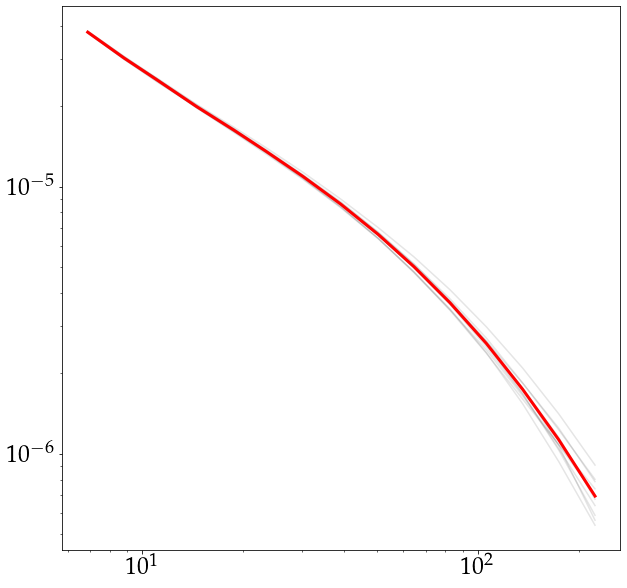

In [20]:
# nside_ymap
pl.figure(figsize=(10, 10))
for ji in range(nsim):
    pl.plot(r_kappaw, xi_kappa_new[:, ji], color='k', alpha=0.1)
pl.plot(r_kappaw, np.mean(xi_kappa_new, axis=1), color='r', lw=3)
pl.xscale('log')
pl.yscale('log')


In [14]:
xi_kappa_orig.shape

(15, 40)

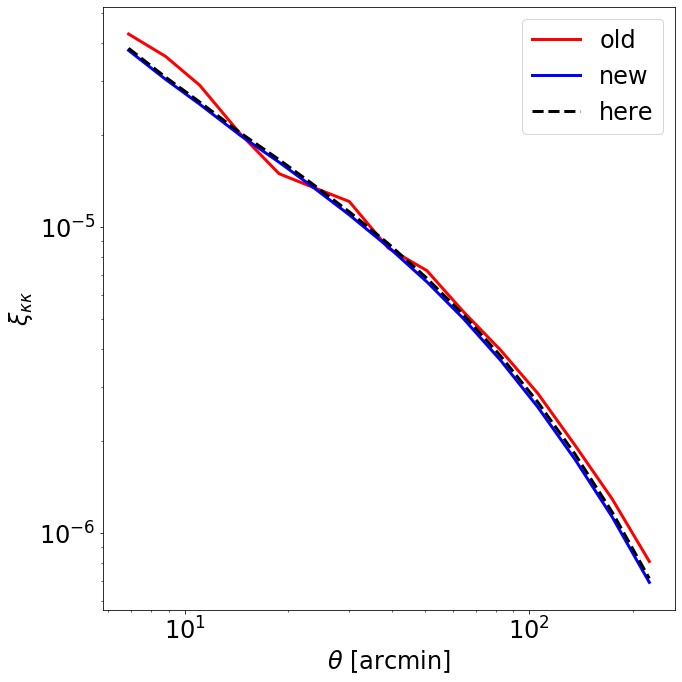

In [13]:
# nside_ymap
# from cProfile import label

pl.rcParams['text.usetex'] = False
pl.figure(figsize=(10, 10))
pl.plot(r_kappaw, np.mean(xi_kappa_orig, axis=1), color='r', lw=3, label='old')
pl.plot(r_kappaw_new, np.mean(xi_kappa_new, axis=1), color='b', lw=3, label='new')
pl.plot(r_kappaw_here, np.mean(xi_kappa_here, axis=1), color='k', ls='--', lw=3, label='here')
pl.legend()
pl.xscale('log')
pl.yscale('log')
pl.ylabel(r'$\xi_{\kappa \kappa}$')
pl.xlabel(r'$\theta$ [arcmin]')
pl.tight_layout()
# pl.savefig('/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/gen_moments/xi_kappa_orig_new_comp.pdf') 




No handles with labels found to put in legend.


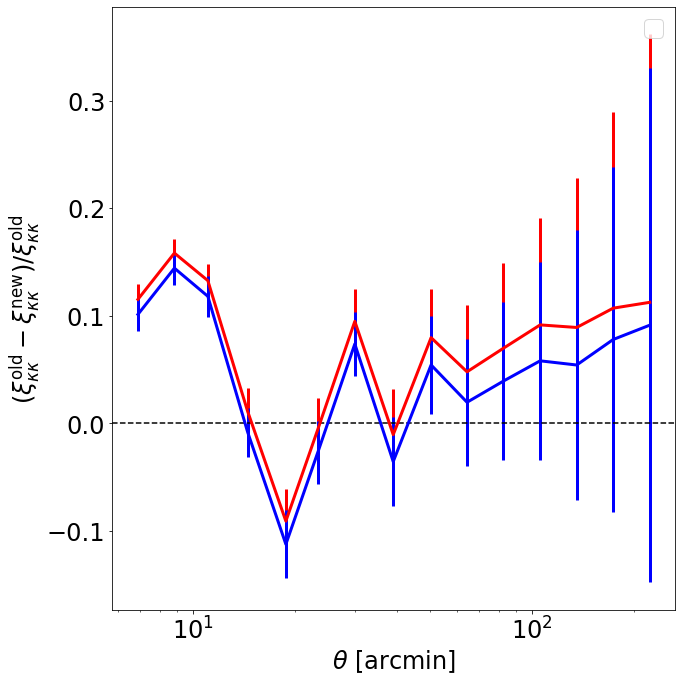

In [15]:
# nside_ymap
from cProfile import label


pl.figure(figsize=(10, 10))
resid_all = np.zeros((nrad, nsim))
for ji in range(nsim):
    resid_all[:,ji] = (xi_kappa_orig[:, ji] - xi_kappa_new[:, ji])/xi_kappa_orig[:, ji]
resid_all2 = np.zeros((nrad, nsim))    
for ji in range(nsim):
    resid_all2[:,ji] = (xi_kappa_orig[:, ji] - xi_kappa_here[:, ji])/xi_kappa_orig[:, ji]    
#     pl.plot(r_kappaw, xi_kappa_new[:, ji], color='k', alpha=0.1)
pl.errorbar(r_kappaw, np.mean(resid_all, axis=1), yerr=np.std(resid_all, axis=1), color='r', lw=3)
pl.errorbar(r_kappaw, np.mean(resid_all2, axis=1), yerr=np.std(resid_all2, axis=1), color='b', lw=3)
# pl.plot(r_kappaw, (np.mean(xi_kappa_orig, axis=1) - np.mean(xi_kappa_new, axis=1))/np.mean(xi_kappa_orig, axis=1), color='r', lw=3, label='old')
# pl.plot(r_kappaw_new, np.mean(xi_kappa_new, axis=1), color='b', lw=3, label='new')
pl.legend()
pl.xscale('log')
pl.axhline(0, color='k', ls='--')
# pl.yscale('log')
pl.ylabel(r'$(\xi^{\rm old}_{\kappa \kappa} - \xi^{\rm new}_{\kappa \kappa})/\xi^{\rm old}_{\kappa \kappa}$')
pl.xlabel(r'$\theta$ [arcmin]')
pl.tight_layout()
pl.savefig('/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/gen_moments/xi_kappa_orig_new_comp_residual.pdf') 




In [2]:
fname = '/global/cfs/cdirs/des/cosmogrid/DESY3/fiducial/cosmo_fiducial/perm_0000/projected_probes_maps_nobaryons512.h5' 
df = h5.File(fname, 'r')
print(df.keys())



<KeysViewHDF5 ['dg', 'ia', 'kg']>


In [11]:
dg1 = df['dg']['desy3metacal1'][:]
ia1 = df['ia']['desy3metacal1'][:]
kg1 = df['kg']['desy3metacal1'][:]




In [15]:
import healpy as hp
import numpy as np
def rotate_map_approx(mask, rot_angles, flip=False,nside = 2048):
    alpha, delta = hp.pix2ang(nside, np.arange(len(mask)))

    rot = hp.rotator.Rotator(rot=rot_angles, deg=True)
    rot_alpha, rot_delta = rot(alpha, delta)
    if not flip:
        rot_i = hp.ang2pix(nside, rot_alpha, rot_delta)
    else:
        rot_i = hp.ang2pix(nside, np.pi-rot_alpha, rot_delta)
    rot_map = mask*0.
    rot_map[rot_i] =  mask[np.arange(len(mask))]
    return rot_map



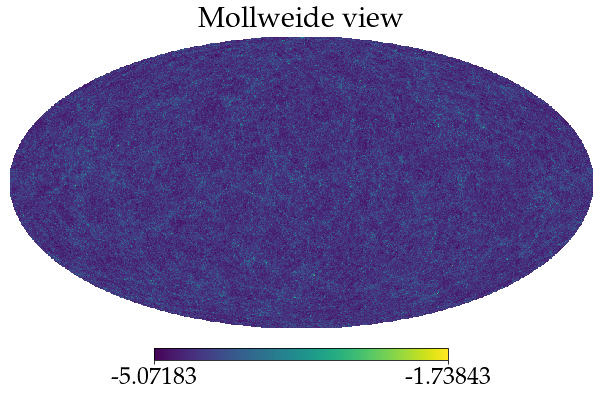

In [13]:
# k1.shape
hp.mollview(np.log(np.abs(kg1)))


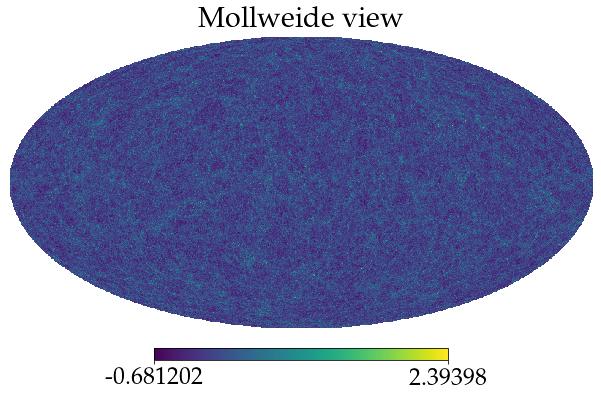

In [14]:
hp.mollview(np.log(np.abs(dg1)))


In [29]:
import sys, os
sys.path.insert(0, '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/gen_moments/')

from Moments_analysis import moments_map
import pickle 
import healpy as hp
import numpy as np
import os
from astropy.table import Table
import gc
import pyfits as pf
# from Moments_analysis import g2k_sphere
import timeit
import os
# from bornraytrace import lensing as brk
import numpy as np
# from bornraytrace import intrinsic_alignments as iaa
# import bornraytrace
from astropy.table import Table    
import healpy as hp
# import frogress
import pyfits as pf
from astropy.cosmology import z_at_value
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
import cosmolopy.distance as cd
from scipy.interpolate import interp1d
import gc
import pandas as pd
import pickle
import multiprocessing
from functools import partial
import h5py as h5


def apply_random_rotation(e1_in, e2_in):
    np.random.seed() # CRITICAL in multiple processes !
    rot_angle = np.random.rand(len(e1_in))*2*np.pi #no need for 2?
    cos = np.cos(rot_angle)
    sin = np.sin(rot_angle)
    e1_out = + e1_in * cos + e2_in * sin
    e2_out = - e1_in * sin + e2_in * cos
    return e1_out, e2_out

def IndexToDeclRa(index, nside,nest= False):
    theta,phi=hp.pixelfunc.pix2ang(nside ,index,nest=nest)
    return -np.degrees(theta-np.pi/2.),np.degrees(phi)

def convert_to_pix_coord(ra, dec, nside=1024):
    """
    Converts RA,DEC to hpix coordinates
    """

    theta = (90.0 - dec) * np.pi / 180.
    phi = ra * np.pi / 180.
    pix = hp.ang2pix(nside, theta, phi, nest=False)

    return pix


def addSourceEllipticity(self,es,es_colnames=("e1","e2"),rs_correction=True,inplace=False):

    """

    :param es: array of intrinsic ellipticities, 

    """

    #Safety check
    assert len(self)==len(es)

    #Compute complex source ellipticity, shear
    es_c = np.array(es[es_colnames[0]]+es[es_colnames[1]]*1j)
    g = np.array(self["shear1"] + self["shear2"]*1j)

    #Shear the intrinsic ellipticity
    e = es_c + g
    if rs_correction:
        e /= (1 + g.conjugate()*es_c)

    #Return
    if inplace:
        self["shear1"] = e.real
        self["shear2"] = e.imag
    else:
        return (e.real,e.imag)

        
def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, protocol=2)
        f.close()

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        mute =  pickle.load(f)
        f.close()
    return mute



def gk_inv(K,KB,nside,lmax):

    alms = hp.map2alm(K, lmax=lmax, pol=False)  # Spin transform!

    ell, emm = hp.Alm.getlm(lmax=lmax)

    kalmsE = alms/( 1. * ((ell * (ell + 1.)) / ((ell + 2.) * (ell - 1))) ** 0.5)
   
    kalmsE[ell == 0] = 0.0

    
    alms = hp.map2alm(KB, lmax=lmax, pol=False)  # Spin transform!

    ell, emm = hp.Alm.getlm(lmax=lmax)

    kalmsB = alms/( 1. * ((ell * (ell + 1.)) / ((ell + 2.) * (ell - 1))) ** 0.5)
   
    kalmsB[ell == 0] = 0.0

    _,e1t,e2t = hp.alm2map([kalmsE,kalmsE,kalmsB] , nside=nside, lmax=lmax, pol=True)
    return e1t,e2t# ,r



def g2k_sphere(gamma1, gamma2, mask, nside=1024, lmax=2048,nosh=True):
    """
    Convert shear to convergence on a sphere. In put are all healpix maps.
    """

    gamma1_mask = gamma1 * mask
    gamma2_mask = gamma2 * mask

    KQU_masked_maps = [gamma1_mask, gamma1_mask, gamma2_mask]
    alms = hp.map2alm(KQU_masked_maps, lmax=lmax, pol=True)  # Spin transform!


    ell, emm = hp.Alm.getlm(lmax=lmax)
    if nosh:
        almsE = alms[1] * 1. * ((ell * (ell + 1.)) / ((ell + 2.) * (ell - 1))) ** 0.5
        almsB = alms[2] * 1. * ((ell * (ell + 1.)) / ((ell + 2.) * (ell - 1))) ** 0.5
    else:
        almsE = alms[1] * 1.
        almsB = alms[2] * 1. 
    almsE[ell == 0] = 0.0
    almsB[ell == 0] = 0.0
    almsE[ell == 1] = 0.0
    almsB[ell == 1] = 0.0

    


    almssm = [alms[0], almsE, almsB]


    kappa_map_alm = hp.alm2map(almssm[0], nside=nside, lmax=lmax, pol=False)
    E_map = hp.alm2map(almssm[1], nside=nside, lmax=lmax, pol=False)
    B_map = hp.alm2map(almssm[2], nside=nside, lmax=lmax, pol=False)

    return E_map, B_map, almsE



def rotate_map_approx(mask, rot_angles, flip=False,nside = 2048):
    alpha, delta = hp.pix2ang(nside, np.arange(len(mask)))

    rot = hp.rotator.Rotator(rot=rot_angles, deg=True)
    rot_alpha, rot_delta = rot(alpha, delta)
    if not flip:
        rot_i = hp.ang2pix(nside, rot_alpha, rot_delta)
    else:
        rot_i = hp.ang2pix(nside, np.pi-rot_alpha, rot_delta)
    rot_map = mask*0.
    rot_map[rot_i] =  mask[np.arange(len(mask))]
    return rot_map





In [34]:
from tqdm import tqdm
seed = 0
rand_rotate_parent_sim=False
config = dict()
config['sources_bins'] = [0,1,2,3]
config['nside'] =  512    
rot = np.mod(seed,4)
jsim = seed//4
if jsim < 10:
    ldir_sims = '/global/cfs/cdirs/des/cosmogrid/DESY3/fiducial/cosmo_fiducial/perm_000' + str(jsim) + '/'
elif jsim < 100:
    ldir_sims = '/global/cfs/cdirs/des/cosmogrid/DESY3/fiducial/cosmo_fiducial/perm_00' + str(jsim) + '/'
elif jsim < 1000:
    ldir_sims = '/global/cfs/cdirs/des/cosmogrid/DESY3/fiducial/cosmo_fiducial/perm_0' + str(jsim) + '/'
else:
    pass
fname = ldir_sims + 'projected_probes_maps_nobaryons512.h5' 
df_sim = h5.File(fname, 'r')    
g1_tomo = dict()
g2_tomo = dict()

# read into memory full sky maps from cosmogrid +++++++++++++
for tomo_bin in tqdm(config['sources_bins']):
    kappa_dfi = df_sim['kg']['desy3metacal' + str(tomo_bin+1)][:]
    if rand_rotate_parent_sim:
        rand_angle = [360.*np.random.rand(), 360.*np.random.rand(), 360.*np.random.rand()]
        kappa_dfi = rotate_map_approx(kappa_dfi, rand_angle, flip=False,nside = config['nside'])
    lmax = 2*config['nside']
    g1i, g2i = gk_inv(kappa_dfi,0.0*kappa_dfi,config['nside'],lmax)
    g1_tomo[tomo_bin] = g1i
    g2_tomo[tomo_bin] = g2i
    if rot ==0:
        pass
    elif (rot ==1):
        g1_tomo[tomo_bin] = rotate_map_approx(g1_tomo[tomo_bin],[ 180 ,0 , 0], flip=False,nside = config['nside'])
        g2_tomo[tomo_bin] = rotate_map_approx(g2_tomo[tomo_bin],[ 180 ,0 , 0], flip=False,nside = config['nside'])
    elif rot ==2:
        g1_tomo[tomo_bin] = rotate_map_approx(g1_tomo[tomo_bin],[ 90 ,0 , 0], flip=True,nside = config['nside'])
        g2_tomo[tomo_bin] = rotate_map_approx(g2_tomo[tomo_bin],[ 90 ,0 , 0], flip=True,nside = config['nside'])
    elif rot ==3:
        g1_tomo[tomo_bin] = rotate_map_approx(g1_tomo[tomo_bin],[ 270 ,0 , 0], flip=True,nside = config['nside'])
        g2_tomo[tomo_bin] = rotate_map_approx(g2_tomo[tomo_bin],[ 270 ,0 , 0], flip=True,nside = config['nside'])
    

maps_PKDGRAV = dict()
sources_maps = dict()

ldir_mcal = '/global/cfs/cdirs/lsst/www/shivamp/gen_mom/process_data/'
maps_PKDGRAV = dict()

sources_maps = dict()
print ('doing the maps!')
for tomo_bin in tqdm(config['sources_bins']):        
    mcal_here = ldir_mcal + 'mcal_tomo_' + str(tomo_bin) + '.h5'
    df_mcal = h5.File(mcal_here, 'r')
    maps_PKDGRAV[tomo_bin] = dict()
    dec1 = df_mcal['dec'][:]
    ra1 = df_mcal['ra'][:]
    w = df_mcal['w'][:]
    
    pix = convert_to_pix_coord(ra1,dec1, nside=config['nside'])
    
    f = 1.
        
    n_map = np.zeros(hp.nside2npix(config['nside']))
    n_map_sc = np.zeros(hp.nside2npix(config['nside']))

    unique_pix, idx, idx_rep = np.unique(pix, return_index=True, return_inverse=True)

    n_map[unique_pix] += np.bincount(idx_rep, weights=w)
    n_map_sc[unique_pix] += np.bincount(idx_rep, weights=w/f**2)

    g1_ = g1_tomo[tomo_bin][pix]
    g2_ = g2_tomo[tomo_bin][pix]
    
    es1,es2 = apply_random_rotation(df_mcal['e1'][:]/f, df_mcal['e2'][:]/f)
    es1a,es2a = apply_random_rotation(df_mcal['e1'][:]/f, df_mcal['e2'][:]/f)

    del df_mcal
    gc.collect()

    x1_sc,x2_sc = addSourceEllipticity({'shear1':g1_,'shear2':g2_},{'e1':es1,'e2':es2},es_colnames=("e1","e2"))

    e1_map_buzz = np.zeros(hp.nside2npix(config['nside']))
    e2_map_buzz = np.zeros(hp.nside2npix(config['nside']))
    e1r_map_buzz = np.zeros(hp.nside2npix(config['nside']))
    e2r_map_buzz = np.zeros(hp.nside2npix(config['nside']))
    unique_pix, idx, idx_rep = np.unique(pix, return_index=True, return_inverse=True)

    e1_map_buzz[unique_pix] += np.bincount(idx_rep, weights= x1_sc*w)
    e2_map_buzz[unique_pix] += np.bincount(idx_rep, weights= x2_sc*w)
    e1r_map_buzz[unique_pix] += np.bincount(idx_rep, weights=es1a*w)
    e2r_map_buzz[unique_pix] += np.bincount(idx_rep, weights=es2a*w)

    mask_sims = n_map_sc != 0.
    e1_map_buzz[mask_sims]  = e1_map_buzz[mask_sims]/(n_map_sc[mask_sims])
    e2_map_buzz[mask_sims] =  e2_map_buzz[mask_sims]/(n_map_sc[mask_sims])
    e1r_map_buzz[mask_sims]  = e1r_map_buzz[mask_sims]/(n_map_sc[mask_sims])
    e2r_map_buzz[mask_sims] =  e2r_map_buzz[mask_sims]/(n_map_sc[mask_sims])

    EE,BB,_   =  g2k_sphere(e1_map_buzz, e2_map_buzz, mask_sims, nside=config['nside'], lmax=config['nside']*2 ,nosh=True)
    EEn,BBn,_ =  g2k_sphere(e1r_map_buzz, e2r_map_buzz, mask_sims, nside=config['nside'], lmax=config['nside']*2 ,nosh=True)

    sources_maps[tomo_bin] = {'EE':EE,'EEn':EEn,'mask':mask_sims} 

mask_sims = hp.read_map('/global/cfs/cdirs/lsst/www/shivamp/gen_mom/process_data/mask_sims.fits',verbose=False)
            
for tomo_bin in config['sources_bins']: 
    sources_maps[tomo_bin]['mask'] = mask_sims
print('STARTING MOM MEASURE')

# def compute_phmoments(sources_maps = None,output='',lab='/global/cfs/cdirs/lsst/www/shivamp/gen_mom/temp_data/'):
#     if not os.path.exists(output+'.pkl'):
#         conf = dict()
#         conf['smoothing_scales'] = np.array([8.2,13.1,21.0,33.6,54.,86.,138,221.]) 
#         conf['nside'] =512
#         conf['lmax'] = conf['nside']*2
#         conf['verbose'] = False
#         conf['output_folder'] =lab

#         mcal_moments = moments_map(conf)

#         tomo_bins = [0,1,2,3]
#         for t in tomo_bins:
#             mcal_moments.add_map(sources_maps[t]['EE'], field_label = 'kE', tomo_bin = t)
#             mcal_moments.add_map(sources_maps[t]['EEn'], field_label = 'kN', tomo_bin = t)
#             if t == 3:
#                 mcal_moments.mask = sources_maps[t]['EE']==sources_maps[t]['EE']

#         if not os.path.exists(conf['output_folder']):
#             try:
#                 os.mkdir(conf['output_folder'])
#             except:
#                 pass
        
#         print('transform and smooth')
#         mcal_moments.transform_and_smooth('convergence','kE',None, shear = False, tomo_bins = tomo_bins, overwrite = False , skip_loading_smoothed_maps = True)         
#         mcal_moments.transform_and_smooth('noise','kN',None, shear = False, tomo_bins = tomo_bins, overwrite = False , skip_loading_smoothed_maps = True)         

#         print('kEkE')
#         mcal_moments.compute_moments_gen( label_moments='kEkE', field_label1 ='convergence_kE', field_label2 ='convergence_kE',  tomo_bins1 = tomo_bins, tomo_bins2 = tomo_bins)
#         print('kEkN')
#         mcal_moments.compute_moments_gen( label_moments='kEkN', field_label1 ='convergence_kE', field_label2 = 'noise_kE', tomo_bins1 = tomo_bins, tomo_bins2 = tomo_bins)
#         print('kNkN')
#         mcal_moments.compute_moments_gen( label_moments='kNkN', field_label1 ='noise_kE', field_label2 = 'noise_kE', tomo_bins1 = tomo_bins, tomo_bins2 = tomo_bins)
#         print('kNkE')
#         mcal_moments.compute_moments_gen( label_moments='kNkE', field_label2 ='convergence_kE', field_label1 = 'noise_kE',  tomo_bins1 = tomo_bins, tomo_bins2 = tomo_bins)


#         del mcal_moments.smoothed_maps
#         del mcal_moments.fields
#         gc.collect()

#         save_obj(output,mcal_moments)

# output_moments = '/global/cfs/cdirs/lsst/www/shivamp/gen_mom/measure'
# label_output1 = 'measure_cosmogrid_jsim_' + str(jsim) + '_rot_' + str(rot) + '_rotparent_' + str(rand_rotate_parent_sim)
# compute_phmoments(sources_maps = sources_maps,
#                         output=output_moments+'/moments_'+label_output1,lab='/global/cfs/cdirs/lsst/www/shivamp/gen_mom/temp_data/'+'temp_'+label_output1 )




  0%|          | 0/4 [00:00<?, ?it/s]/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:108: RuntimeWarning: divide by zero encountered in true_divide
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in true_divide
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:117: RuntimeWarning: divide by zero encountered in true_divide
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:117: RuntimeWarning: invalid value encountered in true_divide


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


 25%|██▌       | 1/4 [00:01<00:05,  1.79s/it]

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


 50%|█████     | 2/4 [00:03<00:03,  1.82s/it]

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


 75%|███████▌  | 3/4 [00:05<00:01,  1.74s/it]

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


  0%|          | 0/4 [00:00<?, ?it/s]

doing the maps!


/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:140: RuntimeWarning: divide by zero encountered in true_divide
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:140: RuntimeWarning: invalid value encountered in multiply
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in true_divide
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:141: RuntimeWarning: invalid value encountered in multiply


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


 25%|██▌       | 1/4 [00:19<00:57, 19.33s/it]

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


 50%|█████     | 2/4 [00:37<00:38, 19.10s/it]

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


 75%|███████▌  | 3/4 [01:00<00:20, 20.08s/it]

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


100%|██████████| 4/4 [01:18<00:00, 19.72s/it]

STARTING MOM MEASURE


In [37]:
# sources_maps = None,output='',lab='/global/cfs/cdirs/lsst/www/shivamp/gen_mom/temp_data/'):
output_moments = '/global/cfs/cdirs/lsst/www/shivamp/gen_mom/measure'
label_output1 = 'measure_cosmogrid_jsim_' + str(jsim) + '_rot_' + str(rot) + '_rotparent_' + str(rand_rotate_parent_sim)
sources_maps = sources_maps
output=output_moments+'/moments_'+label_output1
lab='/global/cfs/cdirs/lsst/www/shivamp/gen_mom/temp_data/'+'temp_'+label_output1


# if not os.path.exists(output+'.pkl'):
conf = dict()
conf['smoothing_scales'] = np.array([8.2,13.1,21.0,33.6,54.,86.,138,221.]) 
conf['nside'] =512
conf['lmax'] = conf['nside']*2
conf['verbose'] = False
conf['output_folder'] =lab

mcal_moments = moments_map(conf)

tomo_bins = [0,1,2,3]
for t in tomo_bins:
    mcal_moments.add_map(sources_maps[t]['EE'], field_label = 'kE', tomo_bin = t)
    mcal_moments.add_map(sources_maps[t]['EEn'], field_label = 'kN', tomo_bin = t)
    if t == 3:
        mcal_moments.mask = sources_maps[t]['EE']==sources_maps[t]['EE']

if not os.path.exists(conf['output_folder']):
    try:
        os.mkdir(conf['output_folder'])
    except:
        pass

print('transform and smooth')
mcal_moments.transform_and_smooth('convergence','kE',None, shear = False, tomo_bins = tomo_bins, overwrite = True , skip_loading_smoothed_maps = False)         
mcal_moments.transform_and_smooth('noise','kN',None, shear = False, tomo_bins = tomo_bins, overwrite = True , skip_loading_smoothed_maps = False)         

print('kEkE')
mcal_moments.compute_moments_gen( label_moments='kEkE', field_label1 ='convergence_kE', field_label2 ='convergence_kE',  tomo_bins1 = tomo_bins, tomo_bins2 = tomo_bins)
print('kEkN')
mcal_moments.compute_moments_gen( label_moments='kEkN', field_label1 ='convergence_kE', field_label2 = 'noise_kE', tomo_bins1 = tomo_bins, tomo_bins2 = tomo_bins)
print('kNkN')
mcal_moments.compute_moments_gen( label_moments='kNkN', field_label1 ='noise_kE', field_label2 = 'noise_kE', tomo_bins1 = tomo_bins, tomo_bins2 = tomo_bins)
print('kNkE')
mcal_moments.compute_moments_gen( label_moments='kNkE', field_label2 ='convergence_kE', field_label1 = 'noise_kE',  tomo_bins1 = tomo_bins, tomo_bins2 = tomo_bins)


# del mcal_moments.smoothed_maps
# del mcal_moments.fields
# gc.collect()

save_obj(output,mcal_moments)






transform and smooth
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0

PicklingError: Can't pickle <class 'Moments_analysis.Compute_moments.moments_map'>: it's not the same object as Moments_analysis.Compute_moments.moments_map

In [38]:
# save_obj(output,mcal_moments)
import dill
dill.dump(mcal_moments, open(output+'.pkl', 'wb'))



PicklingError: Can't pickle <class 'Moments_analysis.Compute_moments.moments_map'>: it's not the same object as Moments_analysis.Compute_moments.moments_map

In [42]:
# mcal_moments.moments.keys()
saved = {}
for key in mcal_moments.moments.keys():
    saved[key] = mcal_moments.moments[key]



In [43]:
# dill.dump()
import dill
dill.dump(saved, open(output+'.pkl', 'wb'))




In [45]:
# saved


In [7]:
import h5py as h5
ldir_sims = '/global/cfs/cdirs/des/cosmogrid/DESY3/fiducial/cosmo_fiducial/perm_0000/'
fname = ldir_sims + 'projected_probes_maps_nobaryons512.h5' 
df_sim = h5.File(fname, 'r')
# print(df.keys())






In [28]:
# np.mod(225, 4)
# 227/4, (227//4)
np.random.rand()



0.8964698444281017

In [9]:
from tqdm import tqdm
config = dict()
config['sources_bins'] = [0,1,2,3]
config['nside'] =  512
rot = 0

# def make_maps(seed):
g1_tomo = dict()
g2_tomo = dict()

# read into memory full sky maps from cosmogrid +++++++++++++
for tomo_bin in tqdm(config['sources_bins']):
    kappa_dfi = df_sim['kg']['desy3metacal' + str(tomo_bin+1)][:]
    lmax = 2*config['nside']
    g1i, g2i = gk_inv(kappa_dfi,0.0*kappa_dfi,config['nside'],lmax)
    g1_tomo[tomo_bin] = g1i
    g2_tomo[tomo_bin] = g2i
    # kg1 = df['kg']['desy3metacal1'][:]
    if rot ==0:
        pass
    elif (rot ==1):
        g1_tomo[tomo_bin] = rotate_map_approx(g1_tomo[tomo_bin],[ 180 ,0 , 0], flip=False,nside = config['nside'])
        g2_tomo[tomo_bin] = rotate_map_approx(g2_tomo[tomo_bin],[ 180 ,0 , 0], flip=False,nside = config['nside'])
        # d_tomo[tomo_bin] = rotate_map_approx(d_tomo[tomo_bin],[ 180 ,0 , 0], flip=False,nside = config['nside'])
    elif rot ==2:
        g1_tomo[tomo_bin] = rotate_map_approx(g1_tomo[tomo_bin],[ 90 ,0 , 0], flip=True,nside = config['nside'])
        g2_tomo[tomo_bin] = rotate_map_approx(g2_tomo[tomo_bin],[ 90 ,0 , 0], flip=True,nside = config['nside'])
        # d_tomo[tomo_bin] = rotate_map_approx(d_tomo[tomo_bin],[ 90 ,0 , 0], flip=True,nside = config['nside'])
    elif rot ==3:
        g1_tomo[tomo_bin] = rotate_map_approx(g1_tomo[tomo_bin],[ 270 ,0 , 0], flip=True,nside = config['nside'])
        g2_tomo[tomo_bin] = rotate_map_approx(g2_tomo[tomo_bin],[ 270 ,0 , 0], flip=True,nside = config['nside'])
        # d_tomo[tomo_bin] = rotate_map_approx(d_tomo[tomo_bin],[ 270 ,0 , 0], flip=True,nside = config['nside'])




  0%|          | 0/4 [00:00<?, ?it/s]/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: divide by zero encountered in true_divide
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: invalid value encountered in true_divide
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:115: RuntimeWarning: divide by zero encountered in true_divide
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:115: RuntimeWarning: invalid value encountered in true_divide


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


 25%|██▌       | 1/4 [00:01<00:04,  1.64s/it]

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


 50%|█████     | 2/4 [00:03<00:03,  1.64s/it]

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


 75%|███████▌  | 3/4 [00:04<00:01,  1.64s/it]

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


100%|██████████| 4/4 [00:06<00:00,  1.63s/it]


In [4]:
# print ('LOADING THE CATALOGS MAPS ++++++++')
st1 = timeit.default_timer()
maps_PKDGRAV = dict()

sources_maps = dict()

mcal_catalog = load_obj('/global/cfs/cdirs/des/mass_maps/Maps_final/data_catalogs_weighted')

maps_PKDGRAV = dict()

sources_maps = dict()
print ('doing the maps!')
for tomo_bin in tqdm(config['sources_bins']):        

    maps_PKDGRAV[tomo_bin] = dict()
    dec1 = mcal_catalog[tomo_bin]['dec']
    ra1 = mcal_catalog[tomo_bin]['ra']
    
    w = mcal_catalog[tomo_bin]['w'] 
    
    pix = convert_to_pix_coord(ra1,dec1, nside=config['nside'])
    
    f = 1.
        
    n_map = np.zeros(hp.nside2npix(config['nside']))
    n_map_sc = np.zeros(hp.nside2npix(config['nside']))

    unique_pix, idx, idx_rep = np.unique(pix, return_index=True, return_inverse=True)

    n_map[unique_pix] += np.bincount(idx_rep, weights=w)
    n_map_sc[unique_pix] += np.bincount(idx_rep, weights=w/f**2)

    g1_ = g1_tomo[tomo_bin][pix]
    g2_ = g2_tomo[tomo_bin][pix]
    
    

    es1,es2 = apply_random_rotation(mcal_catalog[tomo_bin]['e1']/f, mcal_catalog[tomo_bin]['e2']/f)
    es1a,es2a = apply_random_rotation(mcal_catalog[tomo_bin]['e1']/f, mcal_catalog[tomo_bin]['e2']/f)


#
    del mcal_catalog[tomo_bin]
    gc.collect()


    x1_sc,x2_sc = addSourceEllipticity({'shear1':g1_,'shear2':g2_},{'e1':es1,'e2':es2},es_colnames=("e1","e2"))

    e1_map_buzz = np.zeros(hp.nside2npix(config['nside']))
    e2_map_buzz = np.zeros(hp.nside2npix(config['nside']))
    e1r_map_buzz = np.zeros(hp.nside2npix(config['nside']))
    e2r_map_buzz = np.zeros(hp.nside2npix(config['nside']))
    #g1_map_buzz = np.zeros(hp.nside2npix(config['nside']))
    #g2_map_buzz = np.zeros(hp.nside2npix(config['nside']))
    unique_pix, idx, idx_rep = np.unique(pix, return_index=True, return_inverse=True)

    e1_map_buzz[unique_pix] += np.bincount(idx_rep, weights= x1_sc*w)
    e2_map_buzz[unique_pix] += np.bincount(idx_rep, weights= x2_sc*w)
    e1r_map_buzz[unique_pix] += np.bincount(idx_rep, weights=es1a*w)
    e2r_map_buzz[unique_pix] += np.bincount(idx_rep, weights=es2a*w)
    #g1_map_buzz[unique_pix] += np.bincount(idx_rep, weights= g1_*w)
    #g2_map_buzz[unique_pix] += np.bincount(idx_rep, weights= g2_*w)
    mask_sims = n_map_sc != 0.
    e1_map_buzz[mask_sims]  = e1_map_buzz[mask_sims]/(n_map_sc[mask_sims])
    e2_map_buzz[mask_sims] =  e2_map_buzz[mask_sims]/(n_map_sc[mask_sims])
    e1r_map_buzz[mask_sims]  = e1r_map_buzz[mask_sims]/(n_map_sc[mask_sims])
    e2r_map_buzz[mask_sims] =  e2r_map_buzz[mask_sims]/(n_map_sc[mask_sims])
    #g1_map_buzz[mask_sims]  = g1_map_buzz[mask_sims]/(n_map_sc[mask_sims])
    #g2_map_buzz[mask_sims] =  g2_map_buzz[mask_sims]/(n_map_sc[mask_sims])



    EE,BB,_   =  g2k_sphere(e1_map_buzz, e2_map_buzz, mask_sims, nside=config['nside'], lmax=config['nside']*2 ,nosh=True)
    EEn,BBn,_ =  g2k_sphere(e1r_map_buzz, e2r_map_buzz, mask_sims, nside=config['nside'], lmax=config['nside']*2 ,nosh=True)

    #EE[~mask_sims] = 0.
    #EEn[~mask_sims] = 0.
    #BB[~mask_sims] = 0.
    #BBn[~mask_sims] = 0.

    #sources_maps[tomo_bin] = {'g1_map':g1_map,'g2_map':g2_map,'EE':EE,'EEn':EEn,'BB':BB,'BBn':BBn,'mask':mask_sims} 
    sources_maps[tomo_bin] = {'EE':EE,'EEn':EEn,'mask':mask_sims} 

    
    




  0%|          | 0/4 [00:00<?, ?it/s]

doing the maps!


/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:138: RuntimeWarning: divide by zero encountered in true_divide
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:138: RuntimeWarning: invalid value encountered in multiply
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:139: RuntimeWarning: divide by zero encountered in true_divide
/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:139: RuntimeWarning: invalid value encountered in multiply


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


 25%|██▌       | 1/4 [00:17<00:53, 17.81s/it]

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


 50%|█████     | 2/4 [00:35<00:35, 17.84s/it]

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


 75%|███████▌  | 3/4 [00:53<00:17, 17.82s/it]

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


100%|██████████| 4/4 [01:11<00:00, 17.84s/it]


In [ ]:
dec1 = mcal_catalog[4]['dec']
ra1 = mcal_catalog[4]['ra']
pix = convert_to_pix_coord(ra1,dec1, nside=config['nside'])
n_map = np.zeros(hp.nside2npix(config['nside']))
unique_pix, idx, idx_rep = np.unique(pix, return_index=True, return_inverse=True)
n_map[unique_pix] += np.bincount(idx_rep, weights=np.ones(len(ra1)))
mask_sims = n_map!=0.

output_moments = '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/gen_moments'
label_output1 = 'test'

for tomo_bin in config['sources_bins']: 
    sources_maps[tomo_bin]['mask'] = mask_sims

print ('let s save ',output_moments+'/maps_'+label_output1)

save_obj(output_moments+'/maps_'+label_output1,sources_maps)

#pool = multiprocessing.Pool(processes=noise_rels)
# xlist = np.arange(noise_rels)
# st2 = timeit.default_timer()

def compute_phmoments(sources_maps = None,output='',lab=''):
    #try:
    if not os.path.exists(output_moments+'/moments_'+label_output1+'.pkl'):
        # print ('TRYING TO SAVE:  moments_'+label_output1)

        conf = dict()
        conf['smoothing_scales'] = np.array([8.2,13.1,21.0,33.6,54.,86.,138,221.]) 
        conf['nside'] =512
        conf['lmax'] = conf['nside']*2
        conf['verbose'] = False
        conf['output_folder'] =lab

        mcal_moments = moments_map(conf)
        # this add the maps
        tomo_bins = [0,1,2,3]
        for t in tomo_bins:
            mcal_moments.add_map(sources_maps[t]['EE'], field_label = 'kE', tomo_bin = t)
            mcal_moments.add_map(sources_maps[t]['EEn'], field_label = 'kN', tomo_bin = t)
            if t == 3:
                mcal_moments.mask = sources_maps[t]['EE']==sources_maps[t]['EE']

        if not os.path.exists(conf['output_folder']):
            try:
                os.mkdir(conf['output_folder'])
            except:
                pass


        mcal_moments.transform_and_smooth('convergence','kE',None, shear = False, tomo_bins = tomo_bins, overwrite = False , skip_loading_smoothed_maps = True)         
        mcal_moments.transform_and_smooth('noise','kN',None, shear = False, tomo_bins = tomo_bins, overwrite = False , skip_loading_smoothed_maps = True)         

        mcal_moments.compute_moments_gen( label_moments='kEkE', field_label1 ='convergence_kE', field_label2 ='convergence_kE',  tomo_bins1 = tomo_bins, tomo_bins2 = tomo_bins)
    #mcal_moments.compute_moments( label_moments='kBkB', field_label1 ='convergence_kB',  tomo_bins1 = tomo_bins)
        mcal_moments.compute_moments_gen( label_moments='kEkN', field_label1 ='convergence_kE', field_label2 = 'noise_kE', tomo_bins1 = tomo_bins, tomo_bins2 = tomo_bins)
        mcal_moments.compute_moments_gen( label_moments='kNkN', field_label1 ='noise_kE', field_label2 = 'noise_kE', tomo_bins1 = tomo_bins, tomo_bins2 = tomo_bins)
    #mcal_moments.compute_moments( label_moments='kNBkNB', field_label1 ='noise_kB', field_label2 = 'noise_kB', tomo_bins1 = tomo_bins)
        mcal_moments.compute_moments_gen( label_moments='kNkE', field_label2 ='convergence_kE', field_label1 = 'noise_kE',  tomo_bins1 = tomo_bins, tomo_bins2 = tomo_bins)


        del mcal_moments.smoothed_maps
        del mcal_moments.fields
        gc.collect()

        #print ('save:----- ',pp_)
        save_obj(output,mcal_moments)




In [5]:
compute_phmoments(sources_maps = sources_maps,
                        output=output_moments+'/moments_'+label_output1,lab=output_moments+'/temp_'+label_output1 )



NameError: name 'compute_phmoments' is not defined

In [ ]:


   
output_moments= '/global/cfs/cdirs/des/mgatti/maps_shivam_mask_noise/'
output = '/global/cfs/cdirs/des/darkgrid/DarkGrid/'
nside = 512



noise_rels = 1
rot_num = 1
from mpi4py import MPI 
if __name__ == '__main__':
    
    
    runstodo = [...]
   
    run_count=0
    while run_count<len(runstodo):
        comm = MPI.COMM_WORLD
    
        if (run_count+comm.rank)<len(runstodo):
            make_maps(runstodo[run_count+comm.rank])

        run_count+=comm.size
        comm.bcast(run_count,root = 0)
        comm.Barrier() 



